In [1]:
import numpy as np
from dlfs.regression import LinearRegressor
from dlfs.metrics import mae, rmse
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
data = boston.data
target = boston.target
features = boston.feature_names

In [3]:
sc = StandardScaler()
data = sc.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80178)
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [4]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

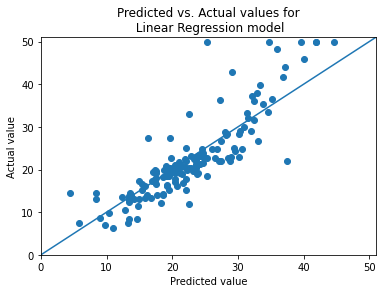

In [5]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\n Linear Regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])
plt.show()

In [6]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 3.3243 
Root mean squared error: 4.8881


In [7]:
print(f'Coefficients: {np.round(lr.coef_, 2)}')

Coefficients: [[-1.03  1.17  0.31  0.84 -1.93  2.31 -0.09 -3.09  2.36 -1.62 -2.06  0.77
  -3.97]]


In [8]:
lr_scratch = LinearRegressor(
    learning_rate=0.001, batch_size=23, n_iter=1000, return_losses=True, return_weights=True,
    seed=180708
)

fit = lr_scratch.fit(X_train, y_train)
losses = fit[0]
weights = fit[1]
preds = lr_scratch.predict(X_test)

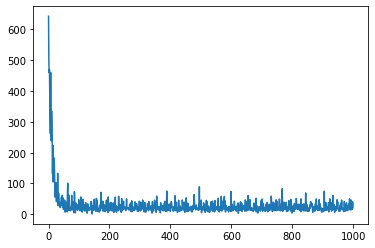

In [9]:
plt.plot(list(range(1000)), losses)
plt.show()

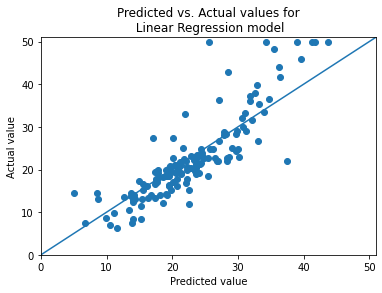

In [10]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\n Linear Regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])
plt.show()

In [11]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 3.4082 
Root mean squared error: 4.9824


In [12]:
print(f"Coefficients: {np.round(lr_scratch._weights['W'], 2)}")

Coefficients: [[-0.96]
 [ 1.06]
 [ 0.3 ]
 [ 0.89]
 [-1.91]
 [ 2.19]
 [-0.1 ]
 [-3.16]
 [ 2.29]
 [-1.45]
 [-2.02]
 [ 0.71]
 [-3.89]]
